In [37]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [2]:
df = pd.read_csv('winequality-red.csv')

### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

The "wine quality" dataset contains information about various physicochemical properties of wines along with their quality ratings.

1. **Fixed Acidity:** Fixed acidity refers to the non-volatile acids present in wine. It contributes to the overall taste and acidity level of the wine. Different levels of fixed acidity can affect the perceived sourness and tartness of the wine.

2. **Volatile Acidity:** Volatile acidity represents the presence of volatile acids like acetic acid in wine. Higher levels of volatile acidity can lead to undesirable vinegar-like flavors and negatively impact the wine's quality.

3. **Citric Acid:** Citric acid is a natural acid found in citrus fruits. It can enhance the freshness and flavor of wine. Wines with appropriate levels of citric acid might be perceived as more vibrant and lively.

4. **Residual Sugar:** Residual sugar refers to the amount of sugar remaining in the wine after fermentation. It can influence the wine's sweetness and balance with other flavors. The right level of residual sugar can contribute to the wine's overall taste profile.

5. **Chlorides:** Chlorides represent the salt content in the wine. Controlled levels of chlorides can enhance the wine's flavor complexity, but excessive levels can lead to a salty taste.

6. **Free Sulfur Dioxide:** Sulfur dioxide is used as a preservative in wine. The amount of free sulfur dioxide can impact the wine's freshness and longevity.

7. **Total Sulfur Dioxide:** Total sulfur dioxide includes both free and bound forms of sulfur dioxide. It can influence the wine's stability, particularly during aging.

8. **Density:** Density is a measure of the wine's mass per unit volume. It can provide insights into the wine's overall composition and concentration.

9. **pH:** pH measures the acidity or alkalinity of the wine. It affects the wine's taste, stability, and overall balance. Wines with appropriate pH levels tend to be more harmonious.

10. **Sulphates:** Sulphates are additives used in winemaking. They can contribute to the wine's preservation and flavor enhancement.

11. **Alcohol:** Alcohol content affects the wine's body, mouthfeel, and perception of heat. It plays a significant role in the wine's overall sensory experience.


### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

1. **Mean or Median Imputation:**
   - **Advantages:** Simple and quick to implement. Does not distort the distribution of the data significantly. Works well when the missing data is missing at random (MAR).
   - **Disadvantages:** Can underestimate the variability and correlations in the data. Might not be suitable if the missing data is not missing at random (MNAR).

2. **Mode Imputation:**
   - **Advantages:** Appropriate for categorical variables with mode-based patterns. Useful when there's a high frequency of certain categories.
   - **Disadvantages:** Ignores relationships between variables. May not capture the complexities of the data.


### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Answer - The key factors are Gender, race ethnicity, lunch.

I have done EDA of the data for analyzing these key features.
I have used the correlation between all these features and the student performance and from my observation all these features are highly correlated with the student performance


### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

**1. Understanding the Dataset:**
Begin by thoroughly understanding the dataset's variables and their meanings. In the student performance dataset, you might have variables like "age," "gender," "study time," "previous failures," "absences," etc.

**2. Domain Knowledge and Hypotheses:**
Leverage your domain knowledge and brainstorm hypotheses about how different factors could affect student performance. For instance, you might hypothesize that "study time" and "absences" could impact exam scores.

**3. Selection of Relevant Features:**
Choose features that are likely to have a meaningful impact on the target variable (exam performance). Features that align with your hypotheses and domain knowledge are good candidates. Avoid features that are redundant or have little predictive power.

**4. Handling Categorical Variables:**
If your dataset includes categorical variables like "gender" or "parental education," you need to encode them into numerical values. You can use techniques like one-hot encoding or label encoding.


**5. Dealing with Missing Data:**
Handle missing values in a way that doesn't introduce bias. You might choose to fill missing values with the median or mean of the column. Alternatively, you could use advanced techniques like imputation or model-based methods.

**6. Scaling and Normalization:**
Normalize numerical features to bring them to a common scale. This ensures that no feature dominates the others during model training. Common scaling methods include Min-Max scaling and Z-score normalization.


### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [3]:
df = pd.read_csv('winequality-red.csv')

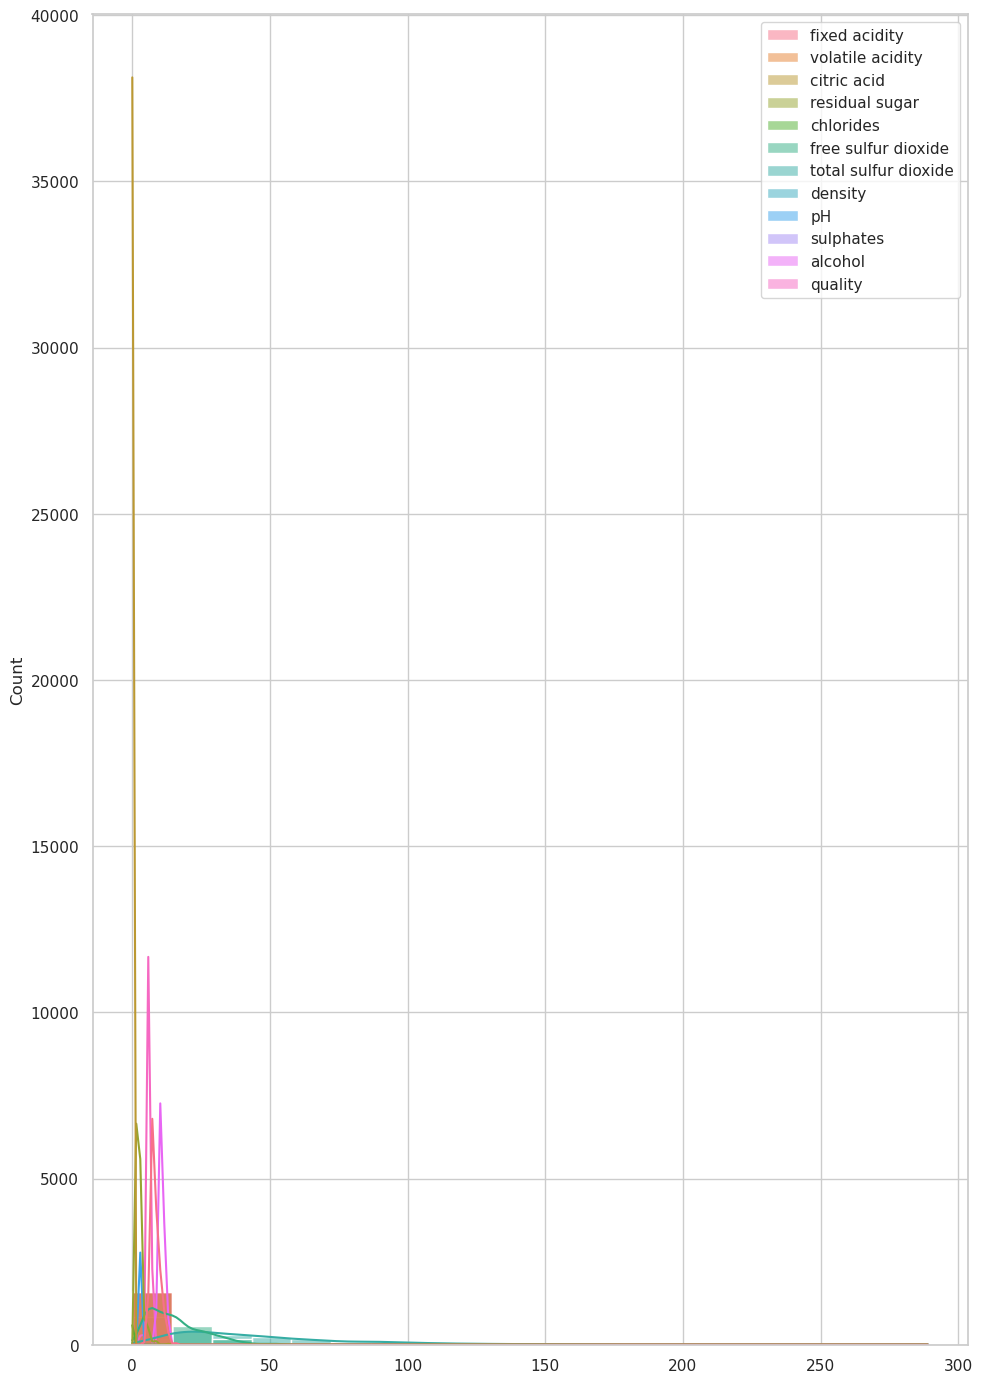

In [13]:
plt.figure(figsize=(10,14))
sns.set(style = 'whitegrid')
sns.histplot(data=df, bins=20, kde=True)
plt.tight_layout()
plt.show()

In [22]:
## Perform shapiro wilko test to check for non-normal features

from scipy.stats import shapiro
non_normal_features = []
for i in df.columns:
    stat, p = shapiro(df[i])
    if p<0.005:
        non_normal_features.append(i)
        
print('Non-normality feature: ', non_normal_features)

Non-normality feature:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


We can apply Quantile Transformation (Rank-Based Transformations) for making the data more normalized

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('winequality-red.csv')

# splitting the features and target
x = df.drop(columns=['quality'])

## Applying standard scaler
x_scaled = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# calculate cumalitive variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine the minimum number of components for 90% variance explained
min_components = np.argmaxm(cumulative_variance>0.90) + 1


print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance)
print("\nMinimum number of components for 90% variance explained:", min_components)

AttributeError: module 'numpy' has no attribute 'argmaxm'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
